In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import scipy.stats

%matplotlib inline


In [2]:
poll = pd.read_csv('poll.csv')

In [3]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [5]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [7]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n)<brown, 'Brown', 'Green')})

In [16]:
dist = pd.DataFrame({'Brown': [sample(0.5).vote.value_counts(normalize=True)['Brown'] for _ in range(10000)]})

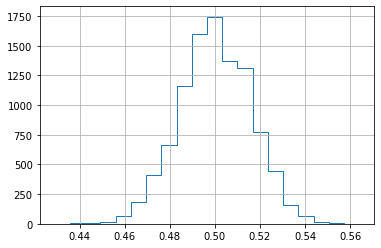

In [17]:
dist.Brown.hist(histtype='step', bins=20)

In [18]:
scipy.stats.percentileofscore(dist.Brown, 0.511)

75.46

In [20]:
largepoll = pd.read_csv('poll-larger.csv')

In [21]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [22]:
dist = pd.DataFrame({'Green':[sample(0.5, 100000).vote.value_counts()['Green'] for _ in range(1000)]})

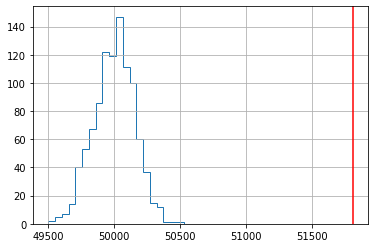

In [25]:
dist.Green.hist(histtype='step', bins=20)
plt.axvline(51810, color='red')